<a href="https://colab.research.google.com/github/pcarbo/qBio9_stuff/blob/main/basic_computing_qbio9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Some initial notes about computing
==================================

The first computer I learned to program on was an [Apple IIc](https://en.wikipedia.org/wiki/Apple_IIc). Things have changed a lot since then:

+ Computing has become highly distributed. (Most likely, a lot of the data for your research will be stored in computers that are very far away from you, and yet you can access these data in seconds. And you can even *analyze your data* on computers far away that you cannot see or touch.)

+ The world of computing has expanded enormously in scope and variety, and [computing technology continues to change rapidly](https://catalog.lib.uchicago.edu/vufind/Record/10996185).

+ [Interactive programming](https://py.mit.edu/spring23/labs/lisp_1) has become a predominant mode for doing computing, in particular for analyzing data.

+ Scientific computing tools, data sets and papers are increasingly **open**. (See [the NIH's new policy on sharing data](https://oir.nih.gov/sourcebook/intramural-program-oversight/intramural-data-sharing/2023-nih-data-management-sharing-policy).)

How should we navigate this complex computing world for our research?

+ *As scientists* navigating this complex computing world, we should strive to understand, and check that our understanding is correct.

+ Focus more on an understanding of the fundamentals and less on the specifics of the transitory technologies.

+ Simple tools and workflows that we understand are sometimes more helpful than complex tools that we don't understand.

+ The ability to organize your work, and make it *human accessible* (even just to you), is now more important than ever. (See: git, HTML, [workflowr](https://doi.org/10.12688/f1000research.20843.1)).

+ We should learn from each other (no single person is an authority).

What is this document?
======================

This is a *jupyter notebook.*

At the most basic level, this is a document divided into *cells*; each cell contains some code and results (numerical results, plots, *etc*) generated by running this code. (Sometimes I will call them "chunks" instead of "cells", but the idea is the same.)

Also, Jupyter notebooks can encode other types of information:
formatted text ([Markdown](https://daringfireball.net/projects/markdown/syntax)), mathematical equations, *etc*---in other words, many of the types of information that you might want to document for your research.

The "raw" information in the notebook is encoded as [XML](https://github.com/pcarbo/qBio9_stuff/blob/main/basic_computing_qbio9.ipynb?short_path=481ca6b).  But the Jupyter notebook format is now widely recognized, so for example [GitHub will show the contents of a Jupyter notebook in a more accessible and evocative way](https://github.com/pcarbo/qBio9_stuff/blob/main/basic_computing_qbio9.ipynb). And of course you can open this document in [Jupyter](https://jupyter.org).

How should I use this document?
===============================

Perhaps the simplest thing you can do is copy and paste chunks code, one cell at a time, into R, or into the Console in RStudio, and examine the outputs.

And of course you can open up this document in Jupyter and run the code in Jupyter. This would be more elegant than the copy-and-paste approach, but not necessarily "better".

Here I'd like to show you how this Jupyter notebook can be used, quite remarkably, to start up a *virtual machine that runs on a server operated by Google.* Even more remarkably, this is done simply by open this link in your favourite browser:

https://colab.research.google.com/github/pcarbo/qBio9_stuff/blob/main/basic_computing_qbio9.ipynb

Once you have done this, run these two lines of code to check that you have a working virtual machine:

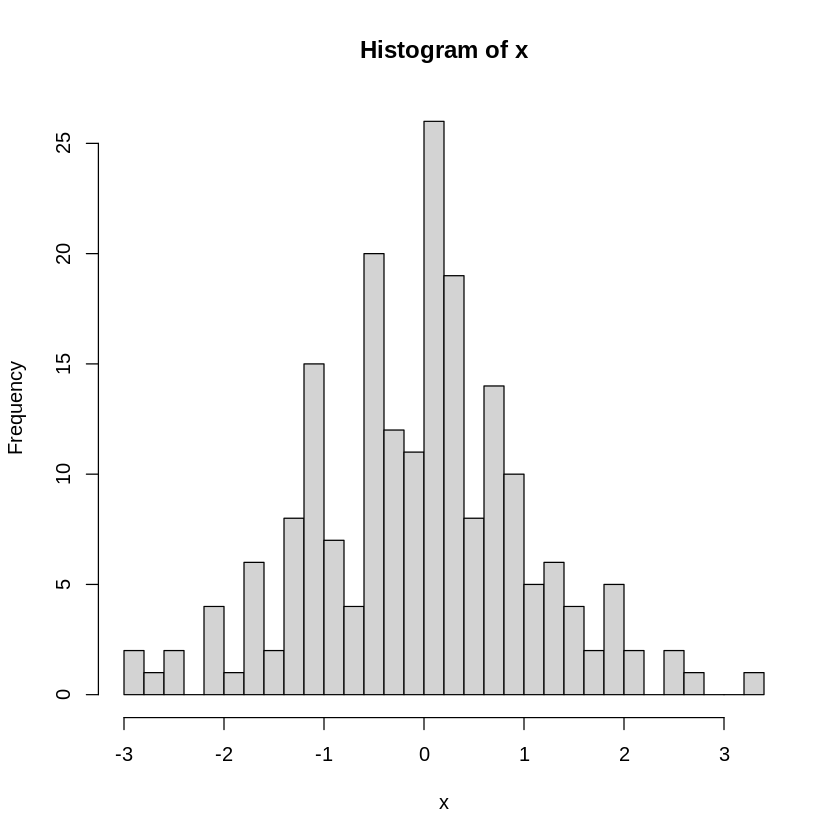

In [ ]:
x <- rnorm(200)
hist(x,n = 32)

This histogram will be different every time you run it because it involves random numbers.

An invitation
=============

This Jupyter notebook in other words is *an invitation* to enter my computing environment and run the computations *exactly as I did*. Let's take a minute to think about this idea of sharing not only code or results of a data anlaysis, but the computing context in which the data analysis was developed. How does this relate to some of the advice about Computing in a Complex World?

A data analysis, briefly
========================

This is my analysis of some data from a [2008 *Genetics* article](https://doi.org/10.1534/genetics.108.087866) on genetics of dog breeds. We will use this analysis as a jumping point to learn about R. But before we seek to *understand what the code is doing*, let's start by *trying to run the code and reproduce the analysis.*

The code is split into two chunks.

The first code chunk sets gets the things we need (data, software libraries) to run the analysis:

In [ ]:
system("wget https://raw.githubusercontent.com/pcarbo/qBio9_stuff/main/dogs.csv")
list.files()
install.packages("ggplot2")
install.packages("ggrepel")
install.packages("cowplot")
install.packages("repr")

[1] "dogs.csv"    "sample_data"

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



The second chunk runs the analysis:


Call:
lm(formula = aod ~ weight, data = dogs)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0786 -0.7385  0.1788  1.0208  3.3865 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.113398   0.216519   65.18   <2e-16 ***
weight      -0.035704   0.003557  -10.04   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.395 on 118 degrees of freedom
Multiple R-squared:  0.4605,	Adjusted R-squared:  0.456 
F-statistic: 100.7 on 1 and 118 DF,  p-value: < 2.2e-16


Warning message:
“ggrepel: 75 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


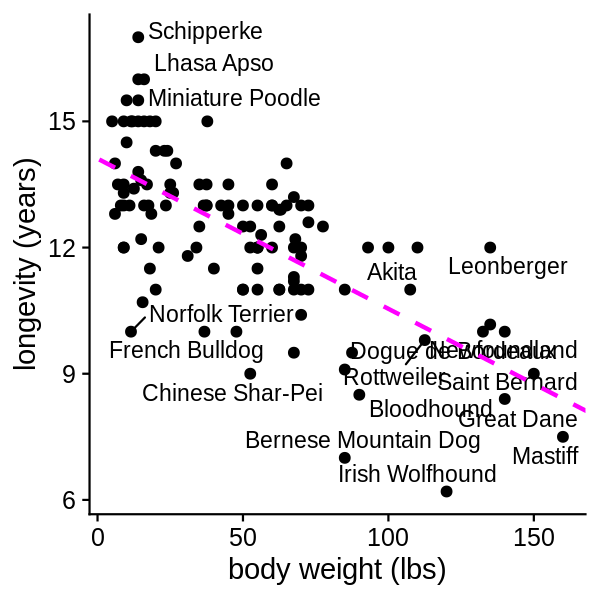

In [ ]:
library("ggplot2")
library("ggrepel")
library("cowplot")
library("repr")
dogs <- read.csv("dogs.csv",stringsAsFactors = FALSE)
fit <- lm(aod ~ weight,dogs)
summary(fit)
a <- coef(fit)["weight"]
b <- coef(fit)["(Intercept)"]
options(repr.plot.width = 4,repr.plot.height = 4,repr.plot.res = 150)
p <- ggplot(dogs,aes_string(x = "weight",y = "aod",label = "breed")) +
  geom_point(size = 2) +
  geom_text_repel() +
  geom_abline(slope = a,intercept = b,col = "magenta",
              linewidth = 1,linetype = "dashed") +
  labs(x = "body weight (lbs)",y = "longevity (years)") +
  theme_cowplot()
p

I hope you were able to run the analysis successfully!

Now we will run the *same analysis again*, but this time we will carefully walk through each step of the analysis.

First, let's clear the variables from the R environment to start the analysis with a clean environment.

In [ ]:
rm(list = ls())

A data analysis, in detail
==========================

Let's now carefully walk through the analysis of the dogs data.

Retrieve the data
-----------------

A key ingredient of course is the data, which we need to retrieve before we can continue. The data are stored in the same GitHub repository where this notebook is stored, and we need to copy it to the virtual machine. There are a number of ways to do this, but I chose to use the shell command "wget" to be transparent about what is going on: (1) wget downloads the file to R's working directory; (2) the working directory is currently `/content`.

In [ ]:
getwd()
system("wget https://raw.githubusercontent.com/pcarbo/qBio9_stuff/main/dogs.csv")
list.files()

[1] "/content"

[1] "dogs.csv"    "dogs.csv.1"  "sample_data"

Install packages
----------------

Next, we download and install some R packages from CRAN. This only needs to be done once (so we don't really need to do again since we already did it above).

Although we don't use these packages immediately, it is good practice to install the packages at the beginning so that we are upfront about what we need to run the analysis.

In [ ]:
install.packages("ggplot2")
install.packages("ggrepel")
install.packages("cowplot")
install.packages("repr")

Load packages
-------------

The functions and other resources in an R package are not available to us in our current session until we tell R that we want to use the package:

In [ ]:
library("ggplot2")
library("ggrepel")
library("cowplot")
library("repr")

You may have figured this out already, nonetheless it is important to note that the *order in which you run the code chunks matters.* For example, you can't load the packages until you install them. The convention in a Jupyter notebook is that code chunks are executed from top to bottom, and you should follow this convention when designing your notebook. (This may seem obvious to many of you, but it is also easy to forget this simple point as you develop a complex data analysis.)

Import the data into R as a data frame
--------------------------------------

The dogs data are stored in a [CSV file](https://github.com/pcarbo/qBio9_stuff/blob/main/dogs.csv). We use the `read.csv` function to *import the data into a data structure that is convenient for analysis in R.* (Note this command will only work if your R working directory is the same as the directory containing `dogs.csv`.) Although this is a single line of code, there is a lot going on under the surface.

In [ ]:
dogs <- read.csv("dogs.csv",stringsAsFactors = FALSE)

Let's deconstruct what we did:

1. We called function `read.csv`. This is a flexible function that can do many, many things, and has many options. To learn more, run `help(read.csv)`. For now, it suffices to know that we set the "file" argument to `"dogs.csv"`, and we set the `stringsAsFactors` argument to FALSE. (In time we will understand why, but to understand why we first need to understand what *factors* are.)

2. The output of `read.csv` is assigned to an object in our R environment which we have called "dogs". If the object does not exist already, it is created. If it does exist, it is overwritten. A common mistake is to forget to assign the output. What happens if we forget to do that?

In [ ]:
read.csv("dogs.csv",stringsAsFactors = FALSE)

What if we had not used the double quotes for `"dogs.csv"`?

In [ ]:
dogs <- read.csv(dogs.csv,stringsAsFactors = FALSE)

What is this object? To find out, we can print out its contents:

In [ ]:
dogs

Or we can summarize its contents:

In [ ]:
summary(dogs)

    breed                aod            height          weight      
 Length:120         Min.   : 6.20   Min.   : 6.00   Min.   :  5.00  
 Class :character   1st Qu.:11.15   1st Qu.:13.00   1st Qu.: 17.38  
 Mode  :character   Median :12.55   Median :19.00   Median : 46.38  
                    Mean   :12.36   Mean   :18.73   Mean   : 49.23  
                    3rd Qu.:13.50   3rd Qu.:24.62   3rd Qu.: 67.50  
                    Max.   :17.00   Max.   :32.00   Max.   :160.00  
                                                                    
   shortcoat      cfa7_46696633bp 
 Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.3455  
 Median :0.0000   Median :0.6880  
 Mean   :0.3043   Mean   :0.6054  
 3rd Qu.:1.0000   3rd Qu.:0.8800  
 Max.   :1.0000   Max.   :1.0000  
 NA's   :5        NA's   :1       

`read.csv` in fact outputs a very special object called a *data frame:*

In [ ]:
class(dogs)

[1] "data.frame"

A data frame is R's main data structure for storing *tabular data.* The data frame is one of the most important data structures in R, and is important enough that we will spend much of this tutorial seeking to understand how to work with and analyze the data in data frames. (Not all data of course is tabular data, but because so many things in R work well with data frames, it can be helpful to find ways to rework your data so that it fits into a data frame.)

If you are used to the "point-and-click" way of doing things (e.g., in Excel), it may seem burdensome to have arrived at this point where we have written a bunch of code, and all we have done is printed the contents of the CSV to the screen. The advantages of R are less obvious when working with a small
data set. Later, we will work with a larger data set.

Perform a linear regression
---------------------------

The data frame contains a lot of interesting data, but I was particularly interested in studying the relationship between a breed's size (using the "weight" column) and the expected longevity (using the "aod" column, short for "age of death"). I used the `lm` function in R, which can be thought of as R's "Swiss army knife" for performing linear regression. ("lm" is short for "linear model", so `lm` is the main function in R for *fitting linear models.*)

In [ ]:
fit <- lm(aod ~ weight,dogs)

The output from `lm` is a particularly complex "lm" object:

In [ ]:
class(fit)

[1] "lm"

Nonetheless, the `summary` function works on the output to give us lots of useful information about how the regression was conducted, and summarizes the key results:

In [ ]:
summary(fit)


Call:
lm(formula = aod ~ weight, data = dogs)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0786 -0.7385  0.1788  1.0208  3.3865 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.113398   0.216519   65.18   <2e-16 ***
weight      -0.035704   0.003557  -10.04   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.395 on 118 degrees of freedom
Multiple R-squared:  0.4605,	Adjusted R-squared:  0.456 
F-statistic: 100.7 on 1 and 118 DF,  p-value: < 2.2e-16


There are other more specialized functions designed to work with `lm` (and other statistical analyses), for example `coef` which extracts a vector containing the least-squares estimates of the coefficients (which in this case is the slope and intercept since we have fit a line).

In [ ]:
coef(fit)

(Intercept)      weight 
14.11339789 -0.03570375

Learning to use `lm` is a mini-expertise in itself—many of you may have done a lot of coding R without ever using `lm`. Not only is the syntax unusual, but `lm`. You can of course learn about `lm` by running `help(lm)`, which opens up the official documentation, but if you are using it for the first time, it is more helpful to learn from some tutorials. For example, I first learned by reading Chapter 6 from Peter Dalgaard's book,
[Introductory Statistics with R](https://catalog.lib.uchicago.edu/vufind/Record/11957555). `lm` has many, many options (i.e., Swiss army knife), with many "helper functions" and you don't need to know everything, but you need to know "enough" to be able to use it correctly. And course beyond knowing how to use the function `lm`, to use it to analyze your data you also need to have some intuition for the statistical ideas, such as what it means to "fit" a linear regression to data, and what the confidence intervals and *p*-values represent

Our call `lm` call is illustrative of many things in R that involve a mini-expertise. There will be some R functions that will be particularly important to your work, and you will become a mini-expert in those functions. For example, if you work with single-cell data, you might gain an expertise in the `umap` function from [the package uwot](https://github.com/jlmelville/uwot) to visualize your data.

The World of R is now so vast that none of us can possibly be experts in all functions in R. But you do not need to be an expert in all areas to benefit from these specialized functions. For example, even if you didn't understand the syntax in the call to `lm`—and I did not expect you to!—the basic rules of R still apply; for example, we see that `lm` generated an output, and `summary` worked well to produce a more accessible summary of the result.

Visualize the linear regression result
--------------------------------------

Almost any data analysis includes some sort of visualization. One particularly powerful way to visualize your data analysis is to combine the data with the results of your analysis (the fit of the linear model), as we do here.

Warning message:
“ggrepel: 75 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


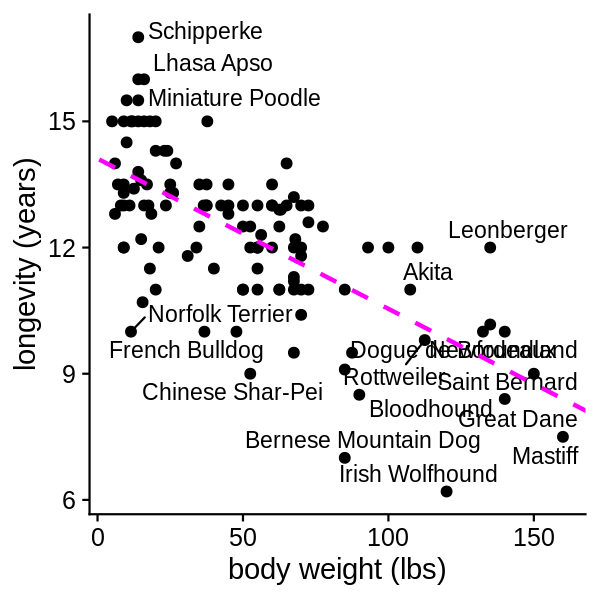

In [ ]:
a <- coef(fit)["weight"]
b <- coef(fit)["(Intercept)"]
options(repr.plot.width = 4,repr.plot.height = 4,repr.plot.res = 150)
p <- ggplot(dogs,aes_string(x = "weight",y = "aod",label = "breed")) +
  geom_point(size = 2) +
  geom_text_repel() +
  geom_abline(slope = a,intercept = b,col = "magenta",
              linewidth = 1,linetype = "dashed") +
  labs(x = "body weight (lbs)",y = "longevity (years)") +
  theme_cowplot()
p

This plot shows how well the line fits the data, and highlights *outliers*, that is the breeds that are furthest away from the trend line.

Let's talk about this code. Again, this code looks very different from other R code. Indeed, this syntax is particular to the [ggplot2 package](ggplot2.tidyverse.org). We will learn more about ggplot2 later.

In fact, this code actually uses three different packages: ggplot2, and two packages *that extend ggplot2*, cowplot and ggrepel.

This illustrates that R code, even only a few lines of code, can quickly get quite complex, involving the interplay of multiple R packages, each of which has its own learning curve. The lesson here is that R code exists along a spectrum of complexity, from simple lines of code that involve the basic syntax to complex lines of code that involve specialized packages and many-featured functions. The latter will take more time and patience to get comfortable with.

Tending to your "gaRden"
========================

A Jupyter notebook proceeds in a linear fashion, building your analysis over time: it starts with loading the packages, importing the data, perhaps some steps to prepare your data for the more complex analyses, executing the analyss, followed by visualization and interpretation.

The problem is that this does not give us a full accounting of *what is actually going on.* What is actually going on is that every line of code is acting on your R environment: it is taking objects that are already in your environment, and using them to generate new objects, or modify existing objects. I think of this as "tending to your gaRden" (your R environment is the garden, and the objects are the fruits, vegetables and flowers in your garden).

This idea of "tending to your garden" is not specific to R—this same notion plays in all *interactive programming languages*, which include Python, MATLAB and Julia. In other words, to understand any line of code in an interactive programming laguage, you need to understand not only the code itself, but also *the state of your environment the moment before you run your code:* the objects that are in your environment and what they represent. This aspect is unfortunately hidden from your Jupyter notebook, and therefore an important skill as a coder is to tend to your garden.

The `objects` function lists the names of the objects in your environment:

In [ ]:
objects()

[1] "a"    "b"    "dogs" "fit"  "p"

*What are these objects?*

*How could we have named these objects to better remind us what these objects are?*

*Are some of these objects "more important" than others?*

Mini-Practice: Create a Jupyter notebook in Google Colab
========================================================

Let's now try out some basic cloud computing skills. I want you to create, from scratch, your own notebook in Google Colab, add a few text cells and code cells. The aim is to reproduce the analysis of the dogs data above. Then save your notebook in Google Drive.

Next, modify your notebook to instead analyze the slightly larger ["more dogs" data set](https://github.com/pcarbo/qBio9_stuff/blob/main/dogs_more.csv) that has data about a few more dog breeds. Then save your notebook in Google Drive.

*Optional exercise:* Save a copy of your notebook in a git repository on GitHub, and include a link in your notebook so that others (and you) may easily start up their own virtual machine using the notebook that you created.

Mini-Practice: Create an R script in RStudio
============================================

Now let's try to reproduce our analysis of the dogs data in RStudio on our computers. In this exercise, we will create an *R script* in RStudio to analyze the data from `dogs.csv`. An R script is different from a Jupyter notebook because it only stores the code (it can also store accompanying text in "comments").

In your script, you do not need to include steps to the install the packages and download the CSV file; you can run those steps separately.

You may find that there are some differences between running the code on a Google Colab virtual machine and running the code in RStudio on your computer. What did you have to do differently in RStudio?

Once you have created a working script, and have saved it somewhere on your computer, we will discuss different strategies for saving the results of our analysis in R.

*Question:* What changes do you need to make to your script to analyze the slight larger data set, [dogs_more.csv](https://github.com/pcarbo/qBio9_stuff/blob/main/dogs_more.csv)?

*Optional exercise:* Implement your analysis of the dogs data as an [R Markdown document](https://kbroman.org/knitr_knutshell/).

A brief tour of RStudio
=======================

For this part of the tutorial, I recommend using RStudio since it works better
than a Jupyter notebook for freeform exploration.

RStudio is an Integrated Development Environment (IDE) for R. The RStudio interface is split up into "panels", which include:

1. **Console:** This is a panel containing an instance of R. For this
tutorial, we will work mainly in this panel.

2. **Source:** In this panel, you can write your code and save it to a
file. The code and also be run from this panel, but the actual results
show up in the console.

3. **Environment:** This panel lists all the variables (objects) you
created in your R environment.

4. **History:** This gives you the history of the commands you typed.

5. **Plots:** This panel shows you all the plots you drew.

Other tabs allow you to access the list of packages you have loaded,
and the help page for commands (e.g., type `help(p.adjust)` in the
console).

Mini-Lab: Understanding and working with data frames
====================================================

The data frame is R's way of storing tabular data. It is one of the most important and more powerful data structures in R, and in this part of the tutorial we will take some time to understand data frames, and how to work with them. Although our focus here is on data frames, many of the ideas we will learn about here also apply to other data structures.

I've divided this Mini-Lab into three parts:

1. **Inspecting the data frame.** First we will learn how to use some basic commands to view different parts of the data frame.

2. **Deconstructing the data frame.** We will take a second look at the laptops data frame, with a greater intention toward understanding R.

3. **Programming Challenge:** You will put your new skills to work to solve some programming exercises involving the dogs data.

Let's start this part of the tutorial with a clean environment.

In [ ]:
rm(list = ls())

Now download and import the larger dogs data set:

In [ ]:
system("wget https://raw.githubusercontent.com/pcarbo/qBio9_stuff/main/dogs_more.csv")
dogs <- read.csv("dogs_more.csv",stringsAsFactors = FALSE)

To remind ourselves, let's print out the first few rows of the table:

In [ ]:
head(dogs)

,breed,aod,height,weight,shortcoat,cfa7_46696633bp
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,Affenpinscher,13.0,10.25,8.0,0,0.375
2,Afghan Hound,12.0,27.00,60.0,0,0.933
3,Airedale Terrier,11.2,23.00,55.0,0,0.947
4,Akita,11.0,27.00,107.5,0,0.750
5,Alaskan Malamute,12.0,24.00,80.0,0,0.914
6,American Cocker Spaniel,12.5,15.00,27.5,0,0.279


On the surface, the data frame looks like a spreadsheet you might load into Excel. But it is actually an example of a data structure with a very specific form:

*The data frame is a set of columns, and each column is a vector of the same length.*

Let's run some code to convince ourselves of these facts.

First, for convenience, copy of the first column, and call it "x":

In [ ]:
x <- dogs$breed

[1] "Affenpinscher"           "Afghan Hound"           
[3] "Airedale Terrier"        "Akita"                  
[5] "Alaskan Malamute"        "American Cocker Spaniel"

[1] "Welsh Springer Spaniel"      "Welsh Terrier"              
[3] "West Highland White Terrier" "Whippet"                    
[5] "Wirehaired Pointing Griffon" "Yorkshire Terrier"

[1] 148

(Note that this makes a *copy* of the original data, so if you were to modify or delete `x`, this would leave `dogs` unchanged.)

This is a "character" data type, which is R's way of storing text data:

In [ ]:
class(x)
length(x)
x

[1] "character"

[1] 148

[1] "Affenpinscher"                      "Afghan Hound"                      
  [3] "Airedale Terrier"                   "Akita"                             
  [5] "Alaskan Malamute"                   "American Cocker Spaniel"           
  [7] "American Eskimo Dog"                "American Pit Bull Terrier"         
  [9] "American Staffordshire Terrier"     "American Water Spaniel"            
 [11] "Australian Cattle Dog"              "Australian Shepherd"               
 [13] "Australian Terrier"                 "Basenji"                           
 [15] "Bassett Hound"                      "Beagle"                            
 [17] "Bearded Collie"                     "Bedlington Terrier"                
 [19] "Belgian Malinois"                   "Belgian Sheepdog"                  
 [21] "Belgian Tervuren"                   "Bernese Mountain Dog"              
 [23] "Bichon Frise"                       "Black Russian Terrier"             
 [25] "Bloodhound"                         "Border Collie"                     
 [27] "Border Terrier"                     "Borzoi"                            
 [29] "Boston Terrier"                     "Bouvier Des Flanders"              
 [31] "Boxer"                              "Briard"                            
 [33] "Brittany"                           "Brussels Griffon"                  
 [35] "Bull Terrier"                       "Bulldog"                           
 [37] "Bullmastiff"                        "Cairn Terrier"                     
 [39] "Cardigan Welsh Corgi"               "Cavalier King Charles Spaniel"     
 [41] "Cesky Terrier"                      "Chesapeake Bay Retriever"          
 [43] "Chihuahua"                          "Chinese Crested"                   
 [45] "Chinese Shar-Pei"                   "Chow Chow"                         
 [47] "Clumber Spaniel"                    "Collie"                            
 [49] "Curly Coated Retriever"             "Dachshund"                         
 [51] "Dalmatian"                          "Dandie Dinmont Terrier"            
 [53] "Doberman Pinscher"                  "Dogue de Bordeaux"                 
 [55] "English Bulldog"                    "English Cocker Spaniel"            
 [57] "English Setter"                     "English Springer Spaniel"          
 [59] "Field Spaniel"                      "Flat Coated Retriever"             
 [61] "Fox Terrier"                        "Fox Terrier toy"                   
 [63] "French Bulldog"                     "German Shepherd"                   
 [65] "German Shorthaired Pointer"         "German Wirehaired Pointer"         
 [67] "Giant Schnauzer"                    "Glen of Imaal Terrier"             
 [69] "Golden Retriever"                   "Gordon Setter"                     
 [71] "Great Dane"                         "Greater Swiss Mountain Dog"        
 [73] "Greyhound"                          "Havanese"                          
 [75] "Hungarian Vizsla"                   "Ibizan Hound"                      
 [77] "Irish Red and White Setter"         "Irish Setter"                      
 [79] "Irish Terrier"                      "Irish Water Spaniel"               
 [81] "Irish Wolfhound"                    "Italian Greyhound"                 
 [83] "Italian Spinone"                    "Jack Russell Terrier"              
 [85] "Japanese Chin"                      "Japanese Shiba Inu"                
 [87] "Keeshond"                           "Kerry Blue Terrier"                
 [89] "Komondor"                           "Labrador Retriever"                
 [91] "Lakeland Terrier"                   "Leonberger"                        
 [93] "Lhasa Apso"                         "Maltese"                           
 [95] "Manchester Terrier"                 "Mastiff"                           
 [97] "Miniature Bull Terrier"             "Miniature Pinscher"                
 [99] "Miniature Poodle"                   "Miniature Schnauzer"               
[1

Note that we could have also copied the first column this way:

In [18]:
x <- dogs[,"breed"]

Or this way:

In [17]:
x <- dogs[,1]

(You will quickly learn that there are often several ways to accomplish the same thing in R. *Which way do you prefer?*)

What makes the data frame a particularly powerful data structure *is that the vectors may contain different types of data.*

By storing tabular data in this way, we can divide and conquer: since each column is also an object in its own right, if the data are too complicated to understand all at once, we can make a copy of the columns we want to look at more closely, then run code on the copies, like we just did for the "breed" column. This is a useful strategy for dealing with complex data sets. (Later we will encounter one.)

To drive home this idea of a data frame as a collection of vectors, the way to *create* a data frame is in fact to join together a bunch of vectors of the same length. For example,

In [ ]:
dogs_new <- data.frame(
  breed = dogs$breed,
  lbs = dogs$weight,
  years = dogs$aod)
head(dogs_new)

,breed,lbs,years
,<chr>,<dbl>,<dbl>
1,Affenpinscher,8.0,13.0
2,Afghan Hound,60.0,12.0
3,Airedale Terrier,55.0,11.2
4,Akita,107.5,11.0
5,Alaskan Malamute,80.0,12.0
6,American Cocker Spaniel,27.5,12.5


Each data structure in R has its own features and has its own techniques for working with them, and and in time you will learn to work with other types of data structures, some that are used widely (e.g., an "lm" object), and some that are specific to a small (or not-so-small) community of researchers (e.g., a [GRanges](https://www.bioconductor.org/packages/release/bioc/vignettes/GenomicRanges/inst/doc/GenomicRangesIntroduction.html) object).

Outline of remaining content:

+ Putting your skills together: analyze the Storm Event data.

+ ggplot2 tutorial using dogs data.

+ ggplot2 Programming Challenge on the Storm Event data.